In [1]:
%load_ext autoreload
%autoreload 2
%run ../draw_functions.py
%run ../kstest.py

In [2]:
from draw_functions import *
from kstest import *

In [3]:
#read csv
df = pd.read_csv('../csv/end.csv')

#ajout du slope
df['slope'] = df.groupby('ResultCurve_id').apply(lambda group: group['xvalue'].diff() / group['xtime'].diff(), include_groups=False).reset_index(level=0, drop=True)
df_02_08 = df[(df['xtime'] >= 0.2) & (df['xtime'] <= 0.8)]
df

,ResultCurve_id,xtime,xvalue,Batch,Sample_Code,slope
0,18E46E80-6090-4DDF-AF31-01FDE5E9C8FE,0.013333,1.604387,224891 21-24,O2B0P0TN4,NaN
1,18E46E80-6090-4DDF-AF31-01FDE5E9C8FE,0.023333,1.401014,224891 21-24,O2B0P0TN4,-20.337301
2,18E46E80-6090-4DDF-AF31-01FDE5E9C8FE,0.033333,1.288029,224891 21-24,O2B0P0TN4,-11.298501
3,18E46E80-6090-4DDF-AF31-01FDE5E9C8FE,0.043333,1.355820,224891 21-24,O2B0P0TN4,6.779100
4,18E46E80-6090-4DDF-AF31-01FDE5E9C8FE,0.053333,1.367119,224891 21-24,O2B0P0TN4,1.129850
...,...,...,...,...,...,...
7619,BB0DA41C-7BCB-4E2C-AD0E-C69DD038CC07,0.411667,1.242835,224891 21-24,O2B0P0TPC,3.389550
7620,BB0DA41C-7BCB-4E2C-AD0E-C69DD038CC07,0.417667,1.276731,224891 21-24,O2B0P0TPC,5.649250
7621,BB0DA41C-7BCB-4E2C-AD0E-C69DD038CC07,0.418067,1.278990,224891 21-24,O2B0P0TPC,5.649250
7622,BB0DA41C-7BCB-4E2C-AD0E-C69DD038CC07,0.421667,1.299328,224891 21-24,O2B0P0TPC,5.649250


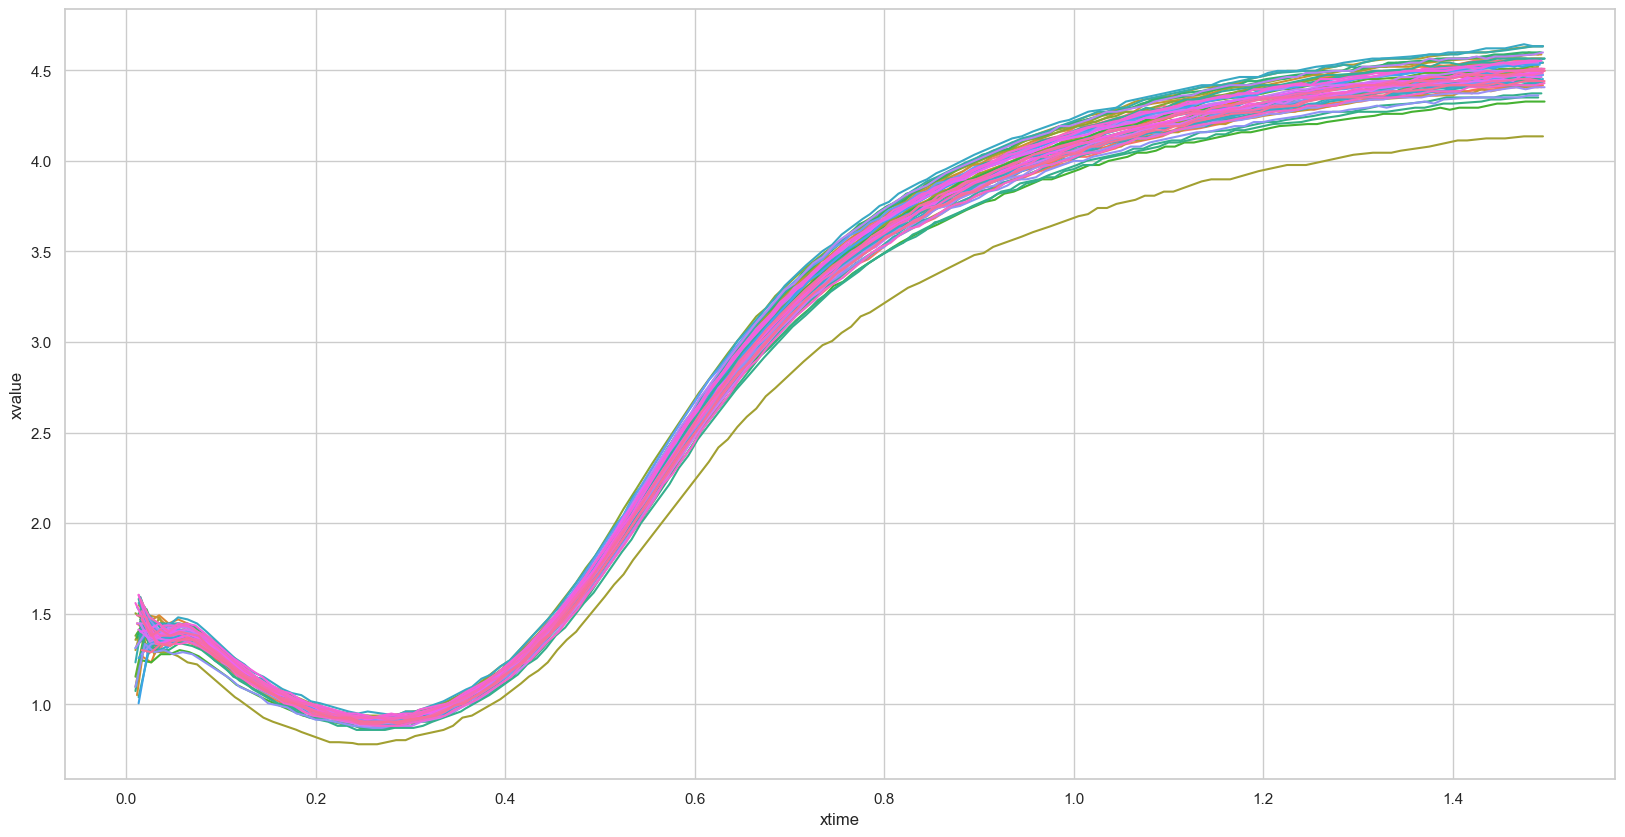

In [4]:
dessiner_commande(df)

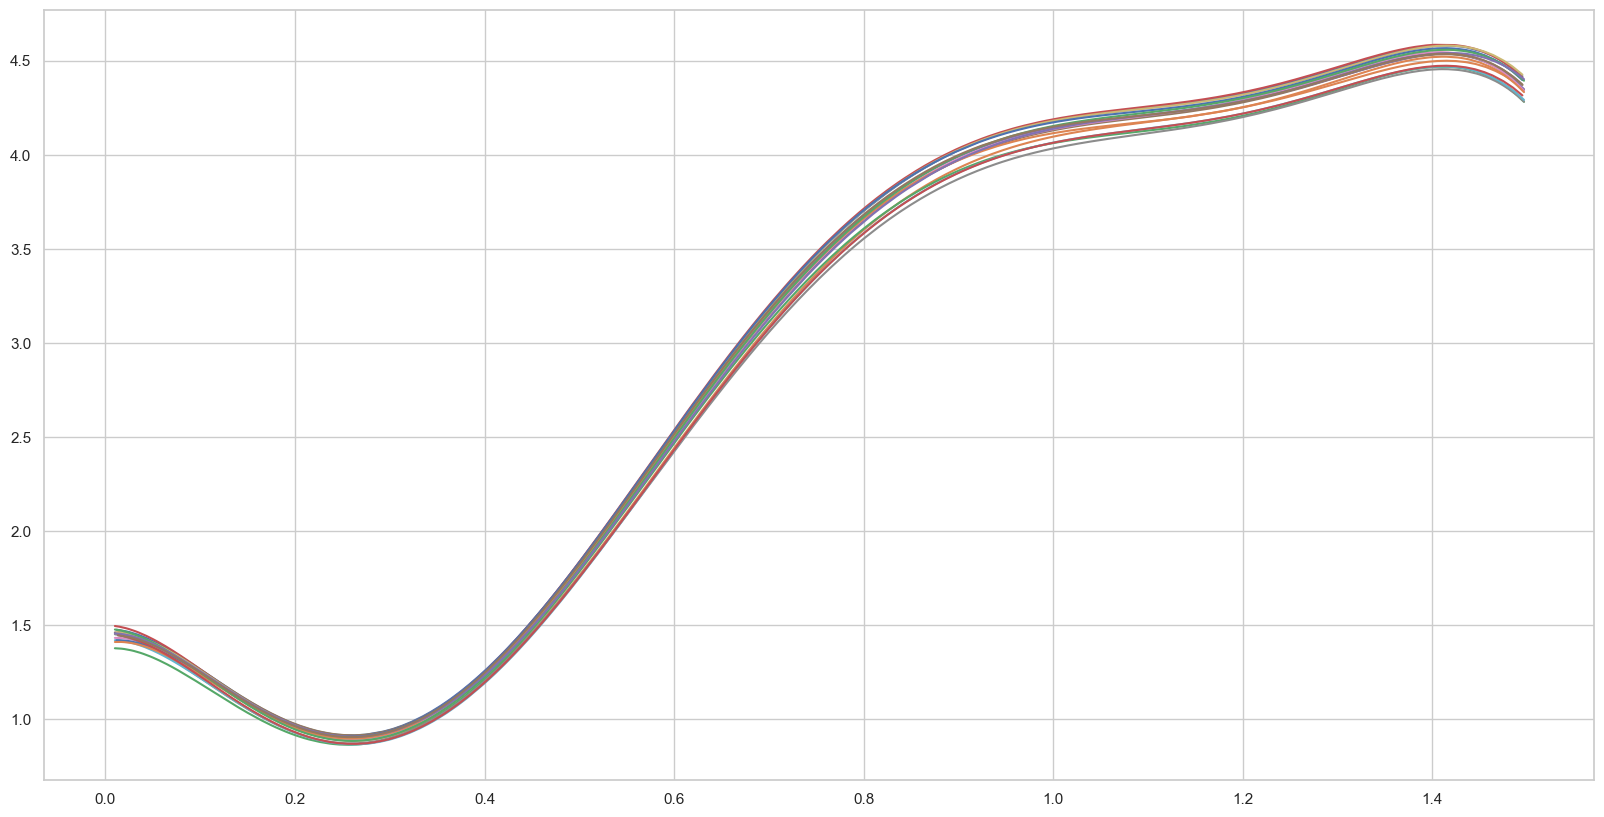

In [5]:
dessiner_commande(df,degree=6)

## Analyse des pentes

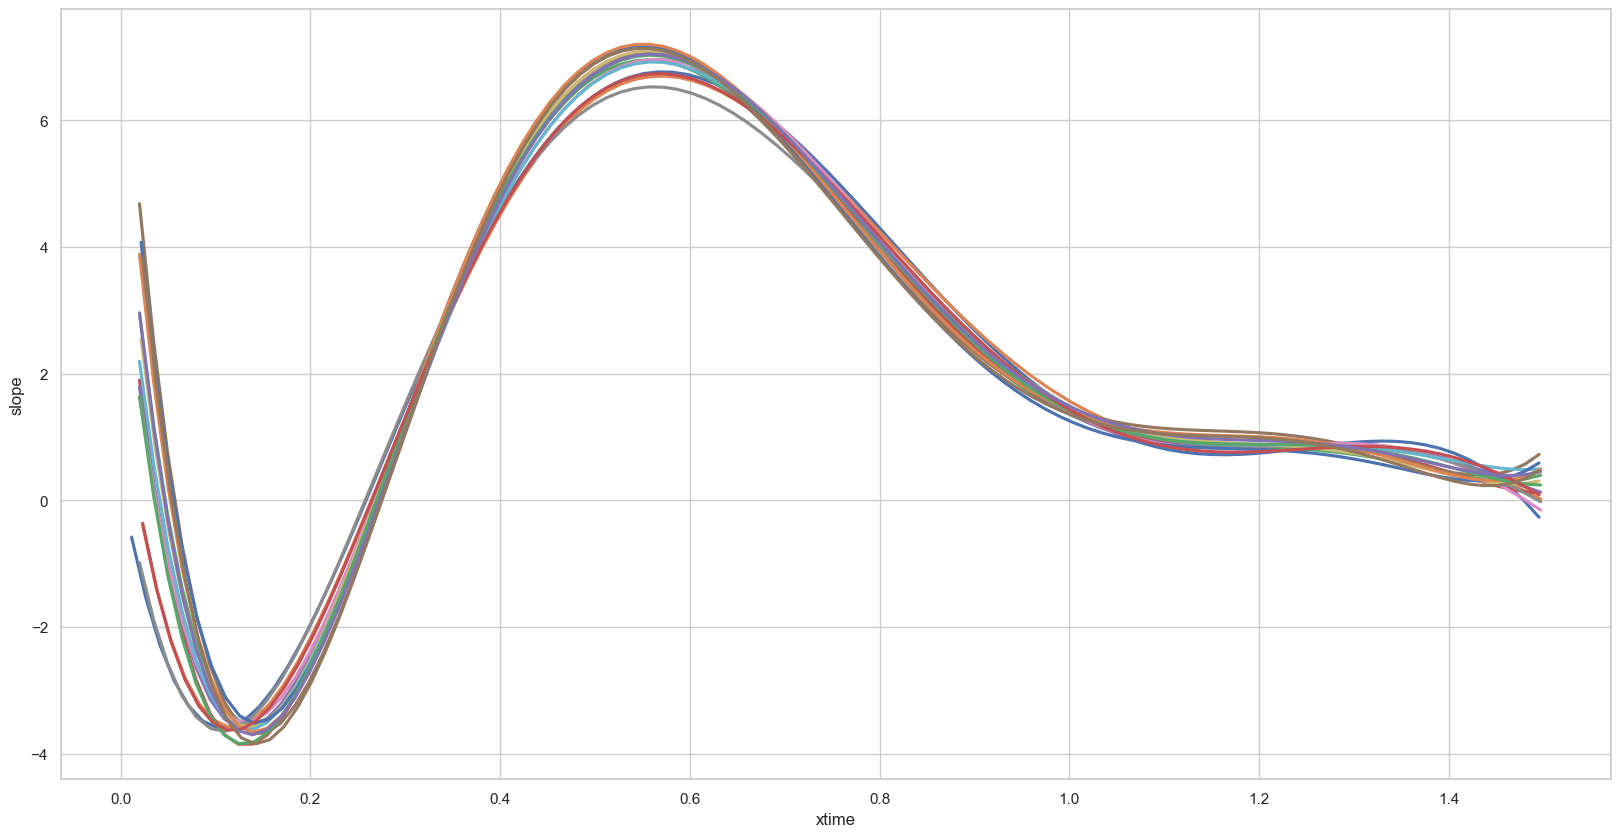

In [8]:
dessiner_commande_slope(df, 6 ,unified=True)

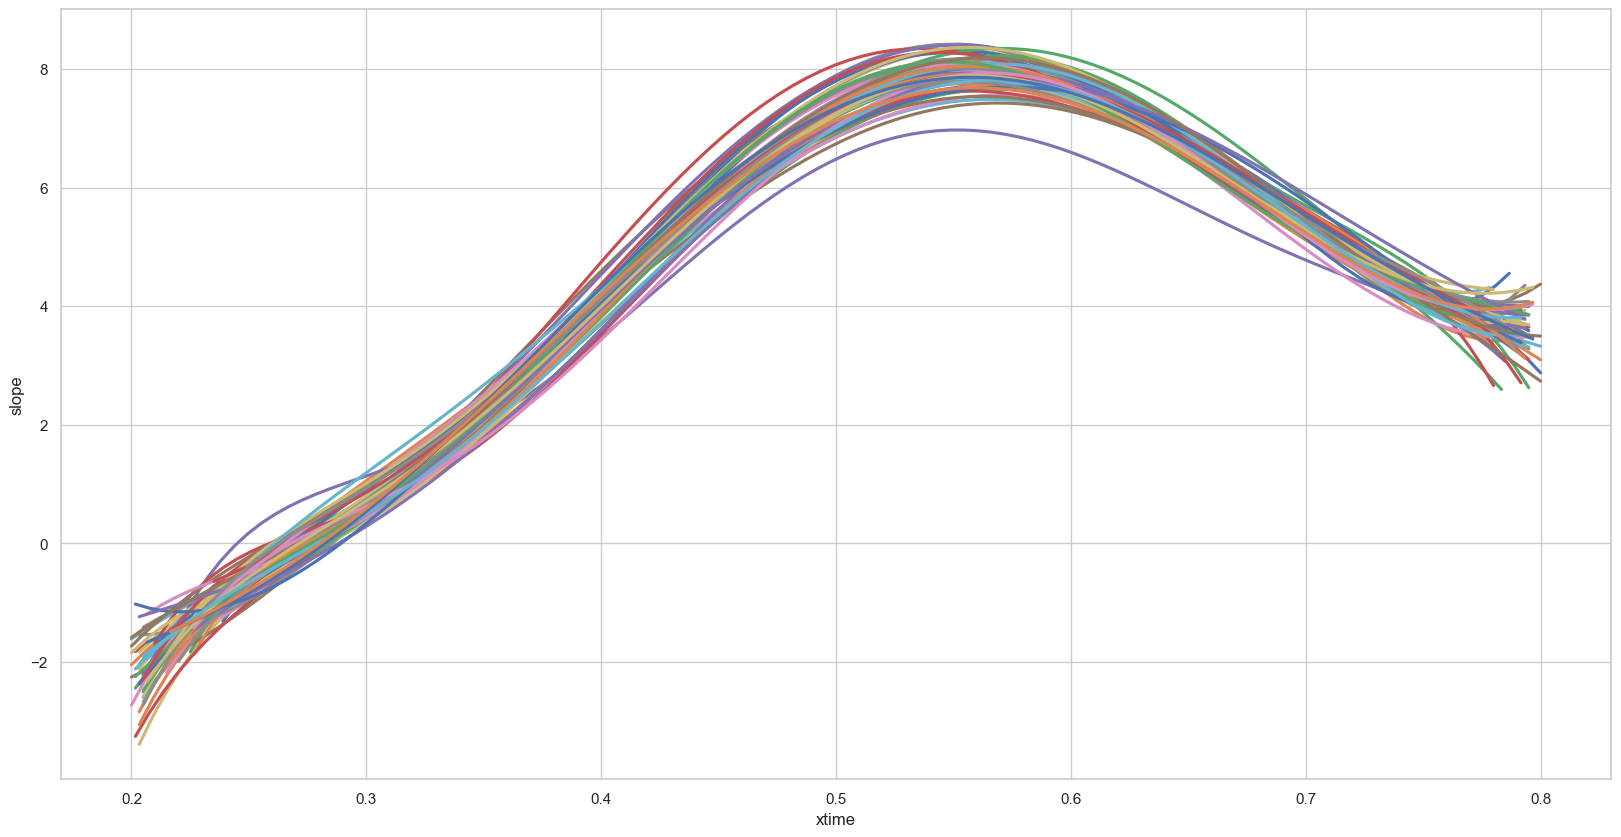

In [9]:
dessiner_commande_slope(df_02_08, 6 ,unified=False)

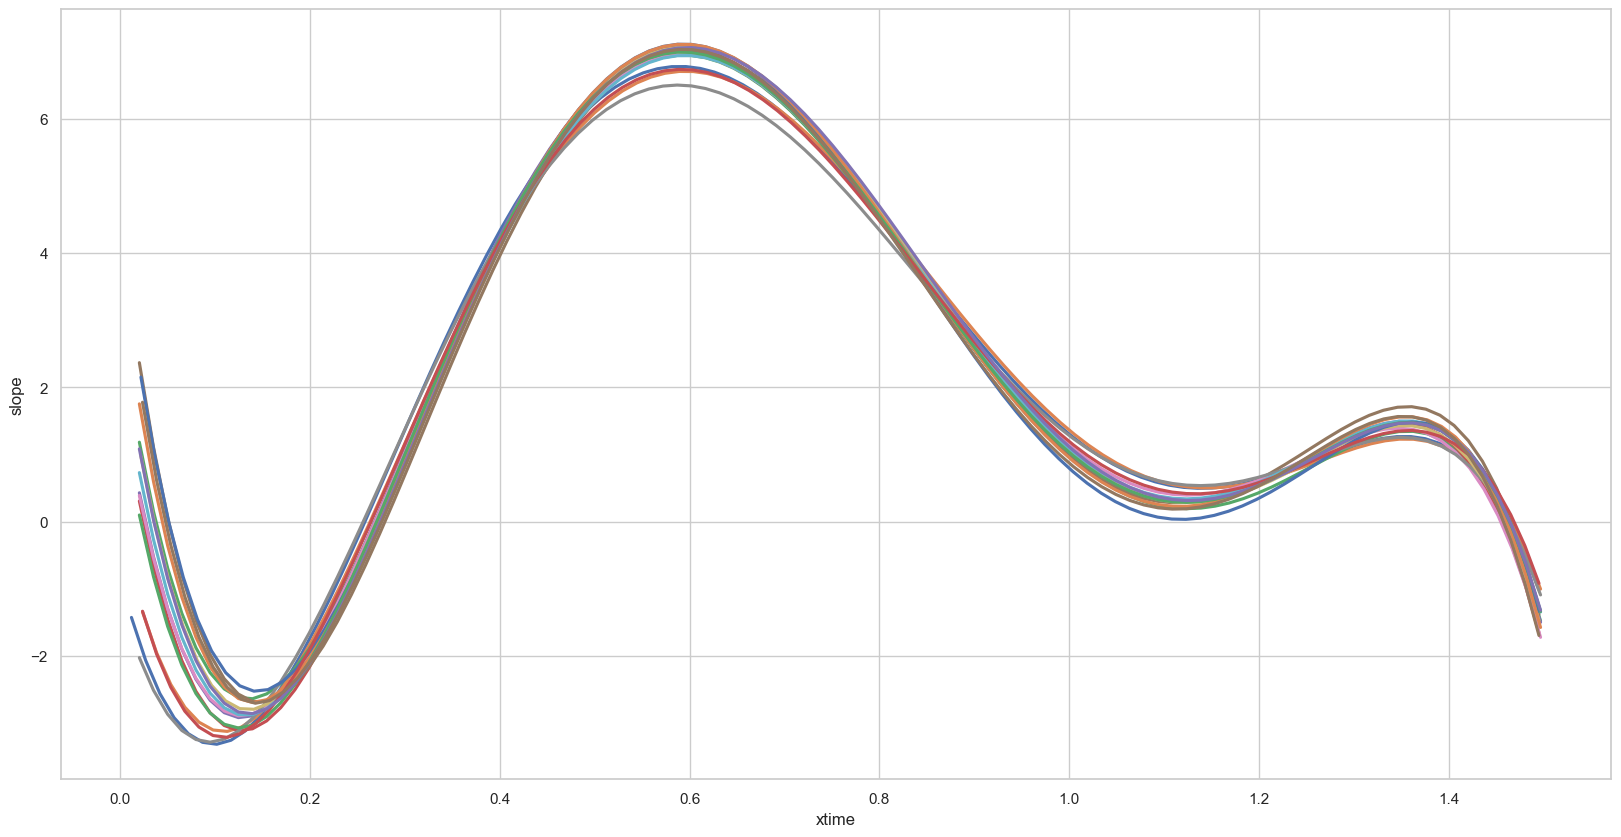

In [8]:
dessiner_commande_slope(df, 5 ,unified=True)

- Batch 224891 17-20: 4.7645952989219476
- Batch 224891 05-08: 3.4556723032150387
- Batch 224891 41-44: 3.1598273612216703
- Batch 224891 13-16: 3.1562174476321383
- Batch 224891 09-12: 2.858069387380887
- Batch 224891 33-36: 2.8480633783692286
- Batch 224891 49-52: 2.5467289916586826
- Batch 224891 45-48: 2.4176732754356385
- Batch 224891 21-24: 2.402641632865829
- Batch 224891 01-04: 2.3526462953499956
- Batch 224891 29-32: 2.0880600122515554
- Batch 224891 61-62: 1.893778733851367
- Batch 224891 57-60: 1.8102974510067926
- Batch 224891 25-28: 1.792777958202227
- Batch 224891 53-56: 1.739069878091384
- Batch 224891 37-40: 1.4520488688932836


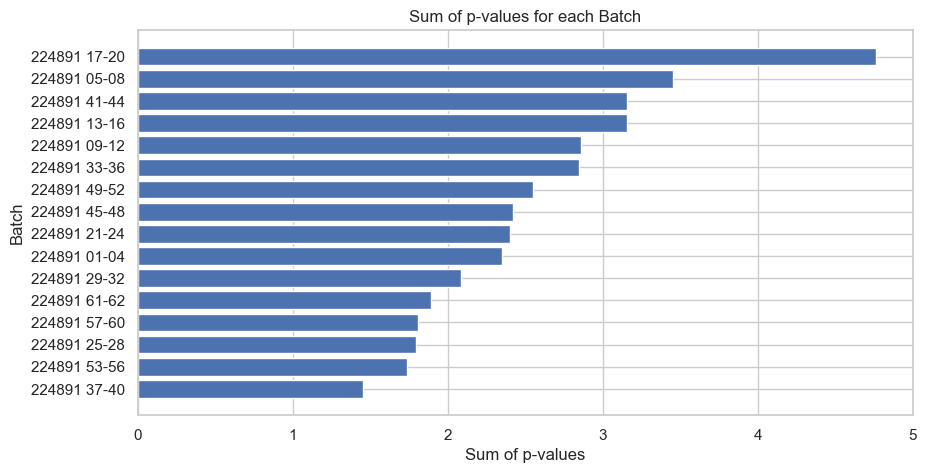

In [9]:
batch_pvalues = ks_test_slope(df, 6)

visualiser_pvalue(batch_pvalues, log=True)

- Batch 224891 17-20: 0.20144084352891725
- Batch 224891 01-04: 0.22999960597087582
- Batch 224891 41-44: 0.2435351660841528
- Batch 224891 33-36: 0.24993051250817847
- Batch 224891 45-48: 0.25153820871661636
- Batch 224891 09-12: 0.2840201220281153
- Batch 224891 29-32: 0.28552768292359626
- Batch 224891 21-24: 0.2934616265894311
- Batch 224891 57-60: 0.3175996340864941
- Batch 224891 05-08: 0.3829380174698645
- Batch 224891 37-40: 0.39685016551862723
- Batch 224891 49-52: 0.40032156711876327
- Batch 224891 13-16: 0.41737478589088955
- Batch 224891 53-56: 0.44860827992670443
- Batch 224891 25-28: 0.4529445064392949
- Batch 224891 61-62: 0.536222181180895


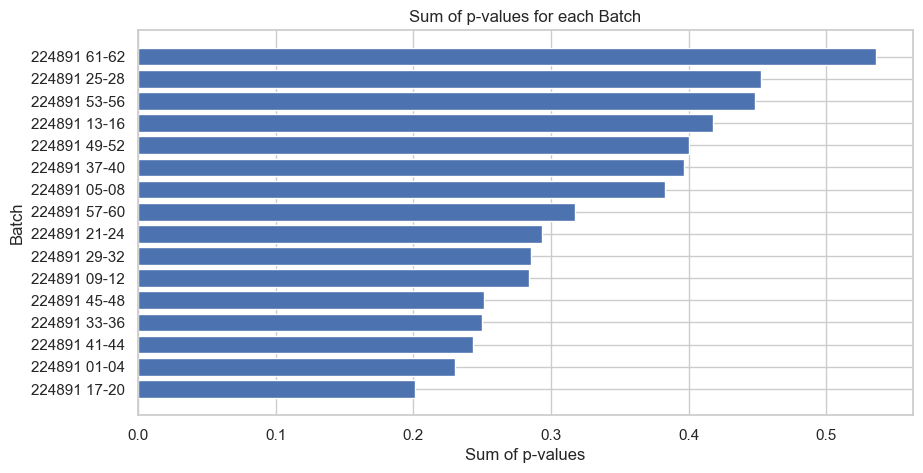

In [10]:
batch_pvalues = ks_test_value(df, 6)

visualiser_pvalue(batch_pvalues, log=False)

In [4]:
# Trouver le xtime correspondant au max de la pente pour chaque groupe
max_slope_sample_xtime = df_02_08.loc[df_02_08.groupby('Sample_Code')['slope'].idxmax()][['Batch', 'xtime']].set_index('Batch')['xtime']
max_slope_batch_xtime = max_slope_sample_xtime.groupby('Batch').median()

# Calculer la médiane de xtime pour chaque groupe
median_xtime = max_slope_sample_xtime.median()

# Calculer la différence entre le xtime du max de la pente et la médiane de xtime pour chaque groupe
diff = max_slope_batch_xtime - 0.4649999999999999

# Sort the differences by their absolute values in descending order
diff_sorted = diff.abs().sort_values(ascending=False)

# Print the differences in the sorted order
for batch in diff_sorted.index:
    print(f"La différence de temps entre le max de la pente et la médiane pour le batch {batch} est : {round(diff_sorted[batch]*60,3)} seconde")

La différence de temps entre le max de la pente et la médiane pour le batch 224891 17-20 est : 8.45 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 224891 45-48 est : 7.25 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 224891 33-36 est : 7.15 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 224891 21-24 est : 6.366 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 224891 09-12 est : 6.364 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 224891 01-04 est : 6.24 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 224891 41-44 est : 5.65 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 224891 61-62 est : 5.611 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 224891 53-56 est : 5.45 seconde
La différence de temps en

In [5]:
round(np.std(max_slope_sample_xtime)*1000,2)

38.02

In [6]:
round(np.std(max_slope_batch_xtime)*1000,2)

21.32